In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
def demanda_normal():
    return np.random.choice(range(7,13),
                            p=[0.05,0.1,0.25,0.3,0.2,0.1])

def demanda_rebaja():
    return np.random.choice(range(2,8),
                            p=[0.2,0.3,0.2,0.15,0.1,0.05])

In [72]:
def z(compradas,normal,rebaja):
    util = -10*compradas
    if compradas>=normal:
        util += normal*25
        compradas-=normal
    elif (compradas>0) and (normal>0):
        util+=compradas*25
        compradas = 0
    if compradas>0:
        if compradas>=rebaja:
            util += rebaja*12.5
            compradas-=rebaja
        else:
            util+=compradas*12.5
    return util

In [73]:
lst_es = []
for p in range(1,100):
    lst_dem = []
    for i in range(10000):
        lst_dem.append(z(p,demanda_normal(),demanda_rebaja()))
    lst_es.append((p,np.array(lst_dem).mean()))

In [74]:
df = pd.DataFrame(lst_es,columns=['postura','ganancia'])

In [75]:
df.loc[df.ganancia==df.ganancia.max()]

,postura,ganancia
11,12,150.06


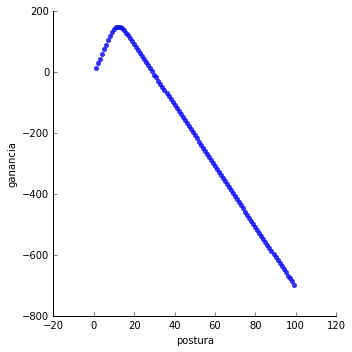

In [76]:
sns.lmplot(data=df,x='postura',y='ganancia',fit_reg=False)